In [162]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from itertools import product
import time
import os

In [163]:
data = np.loadtxt('EarthquakeExerciseData.txt')
scaled_data = 1 + data/max(data) # for plotting purposes
# adding 1 to the obvs value to ensure outward projection, (cos and sin values of the )

In [164]:
def value(x_true,y_true,x_sensor,y_sensor):
    return 1/(0.1+ (x_true-x_sensor)**2 + (y_true-y_sensor)**2)

# Question 1

### Building spherical coordinate system

In [165]:
S=2000 # number of points on the spiral
rate=25 # angular rate of spiral
sd=0.2 # standard deviation of the sensor Gaussian noise

# building the spherical coordinate system as done in setup file
x=np.zeros(S)
y=np.zeros(S)
for s in range(S):
    theta=rate*2*np.pi*s/S 
    r=s/S
    x[s]=r*np.cos(theta)
    y[s]=r*np.sin(theta)


### Computing station locations

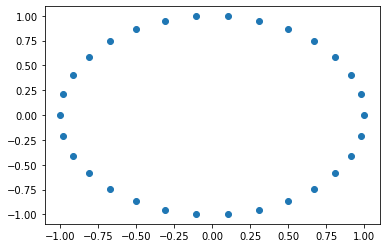

In [166]:
# getting positions of the stations    
N=len(data) # number of stations
sd=0.2 # standard deviation of the sensor noise
x_sensor = np.zeros(N)
y_sensor = np.zeros(N)
for sensor in range(N):
    theta_sensor = 2*np.pi*sensor/N
    x_sensor[sensor] = np.cos(theta_sensor)
    y_sensor[sensor] = np.sin(theta_sensor)

# plotting positions of the stations
plt.scatter(x_sensor, y_sensor)

### Building hypothesis space

In [167]:
# Building hypothesis space
# earthquakes are said to be independent, hence the value function is called independently at every station
if os.path.exists('hypothesis.csv') == False:
    print('Building the hypothesis space...')
    build = time.time()
    hypothesis = np.zeros((S,N))
    for s1,s2 in product(range(0,S), range(0,S)):
        for i in range(N):
            hypothesis[s1][i]=value(x[s1],y[s1],x_sensor[i],y_sensor[i]) + value(x[s2],y[s2],x_sensor[i],y_sensor[i])+ 0.2*np.random.randn() # explosion value
    print('Took',time.time() - build,'seconds to build hypothesis space for 2 earthquakes')
    np.savetxt('hypothesis.csv', hypothesis, delimiter=',', fmt = '%10.5f')
else:
    v = np.loadtxt('hypothesis.csv', dtype='float', delimiter=',')

### Computing/Plotting posterior distribution
Given that prior is uniform, posterior is proportional to the likelihood.

In [168]:
# Determine likelihood, p(location|observed sensor values), given these sensor values
prob=np.zeros(S)
for s in range(S):
    prob[s] += -0.5*np.prod(data -v[s])**2/(sd**2) # follows gaussian distribution (as shown in BRML)
like=np.exp(prob)/np.sqrt(2*np.pi*(sd**2))


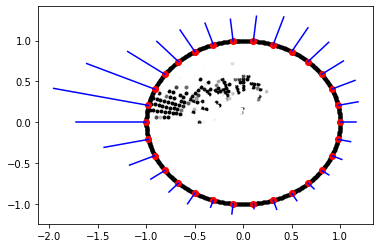

In [178]:
plt.figure()
# plotting posterior
for s in range(S):
    plt.plot(x[s],y[s],".",color=(1-(like[s]/max(like)))*np.array([1,1,1]))


# plottling perimeter
for theta in np.arange(0,2*np.pi,0.01):
    plt.plot(np.cos(theta),np.sin(theta),".",color=[0,0,0])

# plotting station locations
for sensor in range(N):
    plt.plot(x_sensor[sensor],y_sensor[sensor],"o",color=[1,0,0])

# plotting observed values at each sensor (spikes shown in fig (1.3))
for sensor in range(N):
    scale =1
    theta_sensor = 2*np.pi*sensor/N
    base = [x_sensor[sensor],((scaled_data[sensor])*np.cos(theta_sensor))] 
    top = [y_sensor[sensor], ((scaled_data[sensor])*np.sin(theta_sensor))]
    plt.plot(base, top,"-",color='b')

plt.savefig('posterior.png')
plt.show()


# Question 2

### Building hypotheses

In [170]:
# Building hypothesis space for 1 explosion
# earthquakes are said to be independent, hence the value function is called independently at every station
build = time.time()
v_explosion1 = np.zeros((S,N))
for s1 in range(S):
    for i in range(N):
        v_explosion1[s1][i] = value(x[s1],y[s1],x_sensor[i],y_sensor[i]) + sd*np.random.randn() # explosion value
print('Took',time.time() - build,'seconds to build hypothesis space for 1 earthquake')

# Building hypothesis space for 2 explosions - done in question 1
v_explosion2 = np.loadtxt('hypothesis.csv', dtype='float', delimiter=',')

Took 0.22843599319458008 seconds to build hypothesis space for 1 earthquake


### Computing likelihood for both situations

In [171]:
# for 1 explosion
prob1=np.zeros(S)
for s in range(S):
    prob1[s] += -0.5*np.prod(data -v_explosion1[s])**2/(sd**2) # follows gaussian distribution (as shown in BRML)
like1=np.exp(prob1)/np.sqrt(2*np.pi*(sd**2))

# for 2 explosions
prob2=np.zeros(S)
for s in range(S):
    prob2[s] += -0.5*np.prod(data -v_explosion2[s])**2/(sd**2) # follows gaussian distribution (as shown in BRML)
like2=np.exp(prob2)/np.sqrt(2*np.pi*(sd**2))

### Computing log-likelihoods

In [180]:
log_comp = np.log(sum(like2)) - np.log(sum(like1))
print('The value to report is:',np.log(sum(like2)) - np.log(sum(like1)))
print('The bayes factor is ',np.exp(np.log(sum(like2)) - np.log(sum(like1))))

The value to report is: -1.6722195664233057
The bayes factor is  0.18782970212693198


When computing the Bayes Factor, we are assuming that the 2 explosion case is the null hypothesis and the 1 explosion case is the alternate hypothesis. Given the resulting BF of 0.18, we can say that there is moderate evidence for H1, (ie. for a 1 explosion scenario).

# Question 3
see latex

# Question 4
see latex